Introduccion a pytorch clase 1 Instituto Humai 

In [3]:
import torch
import math

In [7]:
x= torch.empty(3,4)
print(type(x),x)

<class 'torch.Tensor'> tensor([[ 5.2530e-08,  4.5574e-41,  5.2530e-08,  4.5574e-41],
        [ 4.4842e-44,  0.0000e+00,  1.1210e-43,  0.0000e+00],
        [-8.0776e-12,  3.0700e-41,  0.0000e+00,  0.0000e+00]])


In [10]:
zeros= torch.zeros(2,3)
print(zeros)

ones = torch.ones(2,3)
print(ones)

torch.manual_seed(2)
rand = torch.rand(2,3)
print(rand)


tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.6147, 0.3810, 0.6371],
        [0.4745, 0.7136, 0.6190]])


Tensores aleatoreos y semillas

In [24]:
cubo = torch.empty(2, 2, 3) # Matriz de (3 MATRICES , 3 FILAS, 3 COLUMNAS) vacía
print(cubo)

empty_like_x = torch.zeros_like(cubo) # Matriz de (3 FILAS, 3 COLUMNAS) vacía
print(empty_like_x)

ones_like_x = torch.ones_like(cubo) # Matriz de (3 FILAS, 3 COLUMNAS) con unos
print(ones_like_x)

rand_like_x = torch.rand_like(cubo) # Matriz de (3 FILAS, 3 COLUMNAS) con valores aleatorios
print(rand_like_x)

tensor([[[5.2530e-08, 4.5574e-41, 5.2530e-08],
         [4.5574e-41, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [2.2590e-01, 7.7052e+31, 7.2148e+22]]])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
tensor([[[0.7133, 0.6944, 0.5993],
         [0.7455, 0.7119, 0.5221]],

        [[0.5530, 0.5382, 0.7668],
         [0.8359, 0.8591, 0.7898]]])


In [31]:
ones = torch.ones((2,5),dtype=torch.int32)
print(ones)
ones_to_float = ones.float() # ones.to(torch.float32)
print(ones_to_float)


tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


COPIANDO TENSORES 

In [41]:
a = torch.ones(2,2)
b = a #a b se le asigna a, pero no es una copia, es un puntero a la misma direccion 
c = a.clone()

a[0][1]= 2

print(b,c)

tensor([[1., 2.],
        [1., 1.]]) tensor([[1., 1.],
        [1., 1.]])


UNSQUEEZE 

transformar dimensiones de matrices 

In [43]:
a = torch.rand(3,226,226)
b = a.unsqueeze(0) #agrega una dimension al comienzo
c = a.unsqueeze(1) #agrega una dimension en la posicion 1
print(a.shape)
print(b.shape)
print(c.shape)


torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])
torch.Size([3, 1, 226, 226])


DATASET DATALOADERS 

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets # Contiene FashionMNIST
from torchvision.transforms import ToTensor, Lambda # Transformaciones
import matplotlib.pyplot as plt # Para graficar


training_data = datasets.FashionMNIST(
    root="data",# Donde se guardan los datos
    train=True,# Entrenamiento
    download=True,# Descargar si no está
    transform=ToTensor(),# Transformar a tensores
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)




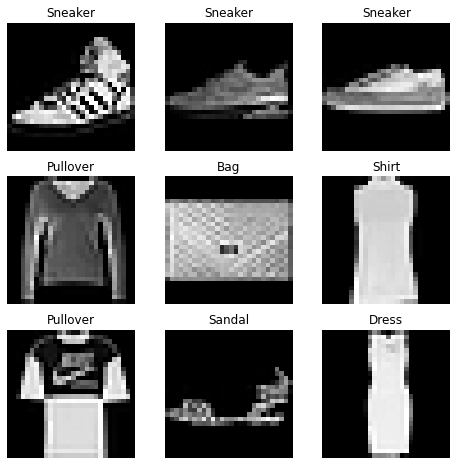

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()#genera un tensor entero aleatorio de tamaño 1 y lo convierte a entero 
    img, label = training_data[sample_idx] #obtiene la imagen y la etiqueta de la muestra aleatoria
    figure.add_subplot(rows, cols, i)   #agrega un subplot a la figura
    plt.title(labels_map[label]) #agrega el titulo a la imagen
    plt.axis("off") #quita los ejes
    plt.imshow(img.squeeze(), cmap="gray") #muestra la imagen en escala de grises y sin ejes y usa el squeeze para quitar las dimensiones de 1
plt.show()

In [7]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


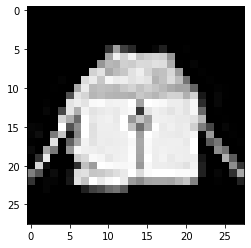

Label: 8


In [10]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


AUTOGRAD 

In [33]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [34]:
#genero un vector de 0 a 2pi con 25 elementos equiespaciados y que requiere gradiente para calcular derivadas
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


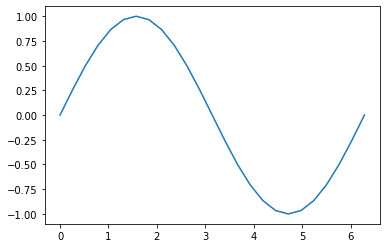

In [36]:
#calculo el seno de mi vector a
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [37]:
#imprimo los valores resultantes de b 
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [38]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [39]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [40]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7f6c903fa630>, 0), (None, 0))
((<SinBackward0 object at 0x7f6c903fa5c0>, 0), (None, 0))
((<AccumulateGrad object at 0x7f6c903fa668>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


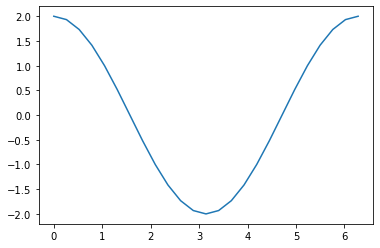

In [41]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach()) #detach() para que no se grafique el grafo de computo

In [46]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()
out.backward()
print(a.grad)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])
